# Random Forest 

## Using Iphone Dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#For Warnings -

import warnings
warnings.filterwarnings('ignore')

### Understanding and Reading Data -

In [4]:
#Reading File -

iphone = pd.read_csv('E:\\iphonepurchases.csv')

In [5]:
iphone.head(10)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [6]:
iphone.shape

(400, 4)

In [7]:
list(iphone.columns)

['Gender', 'Age', 'Salary', 'Purchase Iphone']

In [8]:
#Rename/Remove spaces - 

iphone.rename(columns={'Purchase Iphone':'purchase_iphone'},inplace=True)
print(list(iphone.columns))

['Gender', 'Age', 'Salary', 'purchase_iphone']


In [9]:
iphone.purchase_iphone.value_counts()

0    257
1    143
Name: purchase_iphone, dtype: int64

In [10]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   purchase_iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [11]:
iphone.describe()

,Age,Salary,purchase_iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [12]:
iphone.purchase_iphone.describe()

count    400.000000
mean       0.357500
std        0.479864
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: purchase_iphone, dtype: float64

### Duplicates - 

In [13]:
iphone.duplicated().sum()

20

In [14]:
#Seeing Duplicates -

iphone[iphone.duplicated()]

,Gender,Age,Salary,purchase_iphone
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [16]:
#Removing Dulpicates -

iphone.drop_duplicates(inplace = True)

#Checking after duplicates are removed -

iphone.shape

(380, 4)

In [17]:
iphone.purchase_iphone.value_counts()

0    240
1    140
Name: purchase_iphone, dtype: int64

### Missing Values, Skewness and Kurtosis -

In [18]:
iphone.isnull().sum()

Gender             0
Age                0
Salary             0
purchase_iphone    0
dtype: int64

In [19]:
iphone.skew()

Age                0.239843
Salary             0.461275
purchase_iphone    0.547709
dtype: float64

In [20]:
iphone.kurtosis()

Age               -0.674733
Salary            -0.490309
purchase_iphone   -1.709038
dtype: float64

### Visualization -

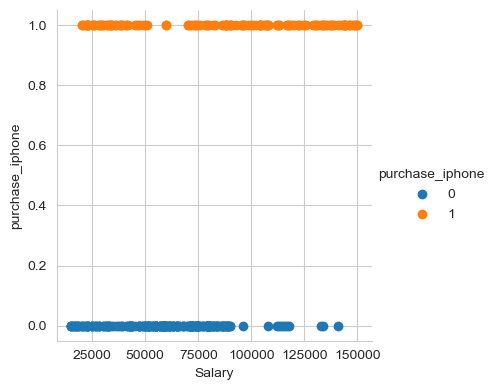

In [21]:
#Using Seaborn, which makes its more informative -

sns.set_style('whitegrid')
sns.FacetGrid(iphone, hue='purchase_iphone', size = 4).map(plt.scatter, 'Salary', 'purchase_iphone').add_legend()

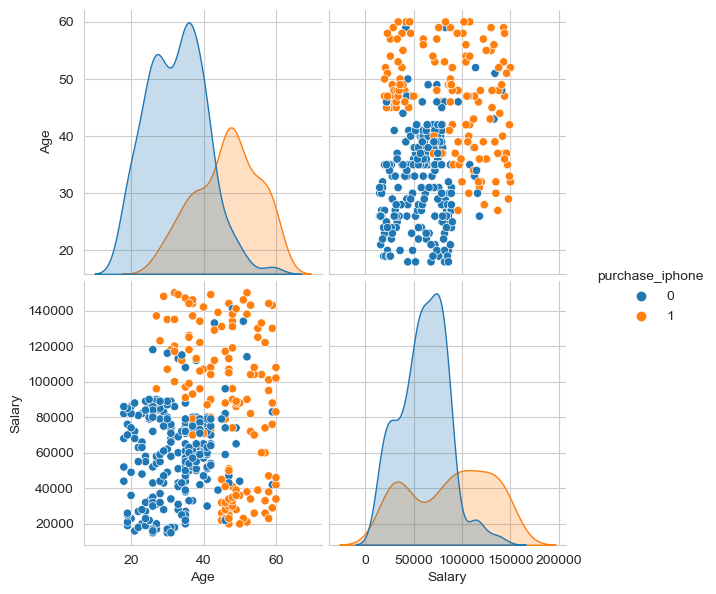

In [22]:
sns.pairplot(iphone, hue='purchase_iphone', height=3)
plt.show()

### Correlation -

In [23]:
iphone.corr()

,Age,Salary,purchase_iphone
Age,1.000000,0.170588,0.626505
Salary,0.170588,1.000000,0.374928
purchase_iphone,0.626505,0.374928,1.000000


In [24]:
#Or - 

fig = plt.figure(figsize=(15,9))
sns.heatmap(iphone.corr() ,cmap='Greys', annot = True)

<AxesSubplot:>

### Training, Testing and Label Encoding -

In [32]:
x = iphone[['Gender', 'Age', 'Salary']]
y = iphone['purchase_iphone']

In [33]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
iphone.Gender = lc.fit_transform(iphone.Gender)

In [34]:
iphone.Gender[: 8]

0    1
1    1
2    0
3    0
4    1
5    1
6    0
7    0
Name: Gender, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(304, 3)
(304,)
(76, 3)
(76,)


### Random Forest - 

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=110)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=110)

In [37]:
y_pred = model.predict(x_test)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
print('Classification Matrix:\n',  classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n',  confusion_matrix(y_test, y_pred))
print('\nAccuracy:',  accuracy_score(y_test, y_pred))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.78      0.78      0.78        23

    accuracy                           0.87        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.87      0.87      0.87        76


Confusion Matrix:
 [[48  5]
 [ 5 18]]

Accuracy: 0.868421052631579


In [40]:
#model.features_importances_

feature = pd.Series(model.feature_importances_ ,index = ['Gender', 'Age', 'Salary'])
print(feature)

Gender    0.012339
Age       0.533001
Salary    0.454660
dtype: float64


In [41]:
model.feature_importances_

array([0.01233907, 0.5330013 , 0.45465963])

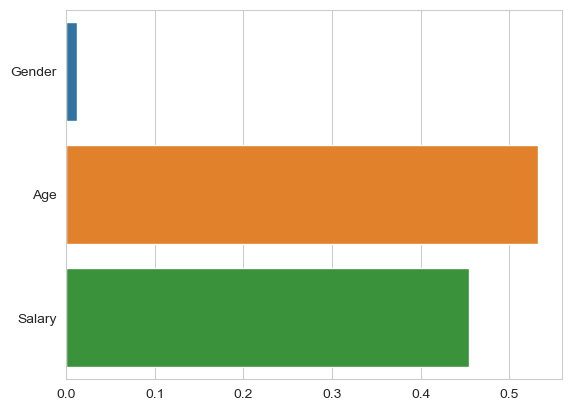

In [43]:
sns.barplot(x = feature, y = feature.index)
plt.show()

In [44]:
#Again Training, Predict and finding Accuracy without Gender -

x = iphone[['Age', 'Salary']]
y = iphone['purchase_iphone']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(304, 2)
(304,)
(76, 2)
(76,)


In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=110)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=110)

In [47]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Matrix:\n',  classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n',  confusion_matrix(y_test, y_pred))
print('\nAccuracy:',  accuracy_score(y_test, y_pred))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.77      0.74      0.76        23

    accuracy                           0.86        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.85      0.86      0.85        76


Confusion Matrix:
 [[48  5]
 [ 6 17]]

Accuracy: 0.8552631578947368


### Whether user will buy Iphone or not -

In [49]:
print('\nUser will buy Iphone or not:',  accuracy_score(y_test, y_pred))


User will buy Iphone or not: 0.8552631578947368
